In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.dates as mdates   
import statsmodels.api as sm
import statsmodels.api as sm




In [2]:
countries_df = pd.read_csv("countries.csv")
holidays_df = pd.read_csv("global_holidays.csv")
passengers_df = pd.read_csv("monthly_passengers.csv")
pib_df = pd.read_csv("Transformed_GDP_Data.csv")

In [3]:
def analizar_dataset(df, nombre):
    print(f"\n📂 Dataset: {nombre}")
    print("-"*50)
    print("Columnas y tipos de datos en pandas:")
    print(df.dtypes)
    print("\nTipos inferidos (numérico, categórico, fecha):")
    
    for col in df.columns:
        dtype = df[col].dtype
        if pd.api.types.is_numeric_dtype(dtype):
            tipo = "Numérico"
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            tipo = "Fecha"
        else:
            tipo = "Categórico / Texto"
        print(f" - {col}: {tipo}")

In [4]:
analizar_dataset(countries_df, "Countries")
analizar_dataset(holidays_df, "Global Holidays")
analizar_dataset(passengers_df, "Monthly Passengers")


📂 Dataset: Countries
--------------------------------------------------
Columnas y tipos de datos en pandas:
alpha_2          object
alpha_3          object
numeric           int64
name             object
official_name    object
common_name      object
dtype: object

Tipos inferidos (numérico, categórico, fecha):
 - alpha_2: Categórico / Texto
 - alpha_3: Categórico / Texto
 - numeric: Numérico
 - name: Categórico / Texto
 - official_name: Categórico / Texto
 - common_name: Categórico / Texto

📂 Dataset: Global Holidays
--------------------------------------------------
Columnas y tipos de datos en pandas:
ADM_name    object
ISO3        object
Date        object
Name        object
Type        object
dtype: object

Tipos inferidos (numérico, categórico, fecha):
 - ADM_name: Categórico / Texto
 - ISO3: Categórico / Texto
 - Date: Categórico / Texto
 - Name: Categórico / Texto
 - Type: Categórico / Texto

📂 Dataset: Monthly Passengers
--------------------------------------------------
Co

In [5]:
print(passengers_df.columns)
passengers_df.head()


Index(['ISO3', 'Year', 'Month', 'Total', 'Domestic', 'International',
       'Total_OS'],
      dtype='object')


ISO3  Year  Month  Total  Domestic  International  Total_OS
0  ALB  2010      1    NaN       NaN            NaN   117.350
1  ALB  2010      2    NaN       NaN            NaN    86.535
2  ALB  2010      3    NaN       NaN            NaN   103.795
3  ALB  2010      4    NaN       NaN            NaN   102.038
4  ALB  2010      5    NaN       NaN            NaN   109.037

In [6]:
print(countries_df.columns)
countries_df.head()


Index(['alpha_2', 'alpha_3', 'numeric', 'name', 'official_name',
       'common_name'],
      dtype='object')


alpha_2 alpha_3  numeric           name                    official_name  \
0      AW     ABW      533          Aruba                              NaN   
1      AF     AFG        4    Afghanistan  Islamic Republic of Afghanistan   
2      AO     AGO       24         Angola               Republic of Angola   
3      AI     AIA      660       Anguilla                              NaN   
4      AX     ALA      248  Åland Islands                              NaN   

  common_name  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [7]:
print(holidays_df.columns)
holidays_df.head()


Index(['ADM_name', 'ISO3', 'Date', 'Name', 'Type'], dtype='object')


ADM_name ISO3        Date                          Name            Type
0    Aruba  ABW  2010-01-01                New Year's Day  Public holiday
1    Aruba  ABW  2010-01-25        Betico Croes' Birthday  Public holiday
2    Aruba  ABW  2010-02-15               Carnival Monday  Public holiday
3    Aruba  ABW  2010-03-18  National Anthem and Flag Day  Public holiday
4    Aruba  ABW  2010-04-02                   Good Friday  Public holiday

In [8]:
print(pib_df.columns)
holidays_df.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Total'],
      dtype='object')


ADM_name ISO3        Date                          Name            Type
0    Aruba  ABW  2010-01-01                New Year's Day  Public holiday
1    Aruba  ABW  2010-01-25        Betico Croes' Birthday  Public holiday
2    Aruba  ABW  2010-02-15               Carnival Monday  Public holiday
3    Aruba  ABW  2010-03-18  National Anthem and Flag Day  Public holiday
4    Aruba  ABW  2010-04-02                   Good Friday  Public holiday

In [9]:
merged = pd.read_csv("merged2_passengers_holidays.csv")

print(merged.head())

  ISO3  Year  Month  Total  Domestic  International  Total_OS year_month  \
0  ALB  2010      1    NaN       NaN            NaN   117.350    2010-01   
1  ALB  2010      2    NaN       NaN            NaN    86.535    2010-02   
2  ALB  2010      3    NaN       NaN            NaN   103.795    2010-03   
3  ALB  2010      4    NaN       NaN            NaN   102.038    2010-04   
4  ALB  2010      5    NaN       NaN            NaN   109.037    2010-05   

   is_holiday_month  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  


In [10]:
print("Columnas en merged:")
print(merged.columns.tolist())
print("\nPrimeras 5 filas:")
print(merged.head())
print("\nInformación del DataFrame:")
print(merged.info())

Columnas en merged:
['ISO3', 'Year', 'Month', 'Total', 'Domestic', 'International', 'Total_OS', 'year_month', 'is_holiday_month']

Primeras 5 filas:
  ISO3  Year  Month  Total  Domestic  International  Total_OS year_month  \
0  ALB  2010      1    NaN       NaN            NaN   117.350    2010-01   
1  ALB  2010      2    NaN       NaN            NaN    86.535    2010-02   
2  ALB  2010      3    NaN       NaN            NaN   103.795    2010-03   
3  ALB  2010      4    NaN       NaN            NaN   102.038    2010-04   
4  ALB  2010      5    NaN       NaN            NaN   109.037    2010-05   

   is_holiday_month  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ISO3              7242 non-nu

Available columns in merged dataset:
['ISO3', 'Year', 'Month', 'Total', 'Domestic', 'International', 'Total_OS', 'year_month', 'is_holiday_month']

Using ISO3 for country codes


C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2412918917.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2412918917.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2412918917.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2412918917.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

<Figure size 1400x1000 with 0 Axes>

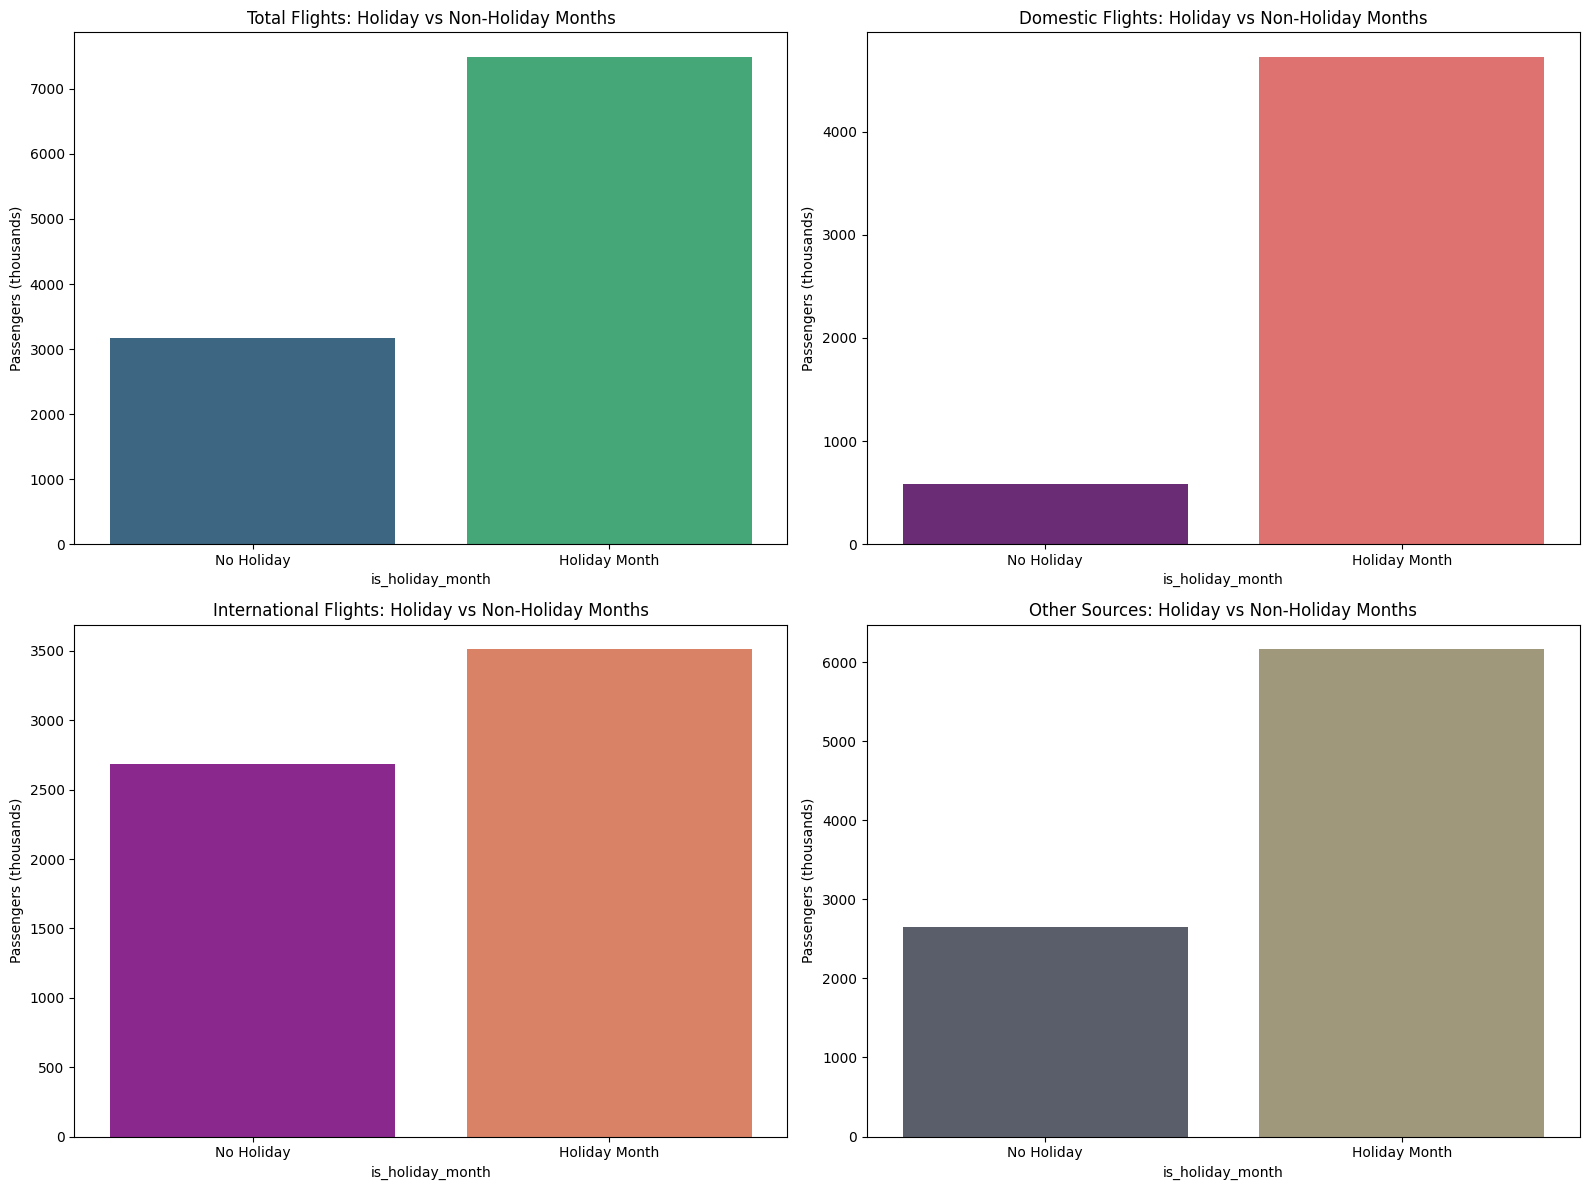

C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2412918917.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_df.index, y=impact_df['Percentage_Change'], palette='rocket')


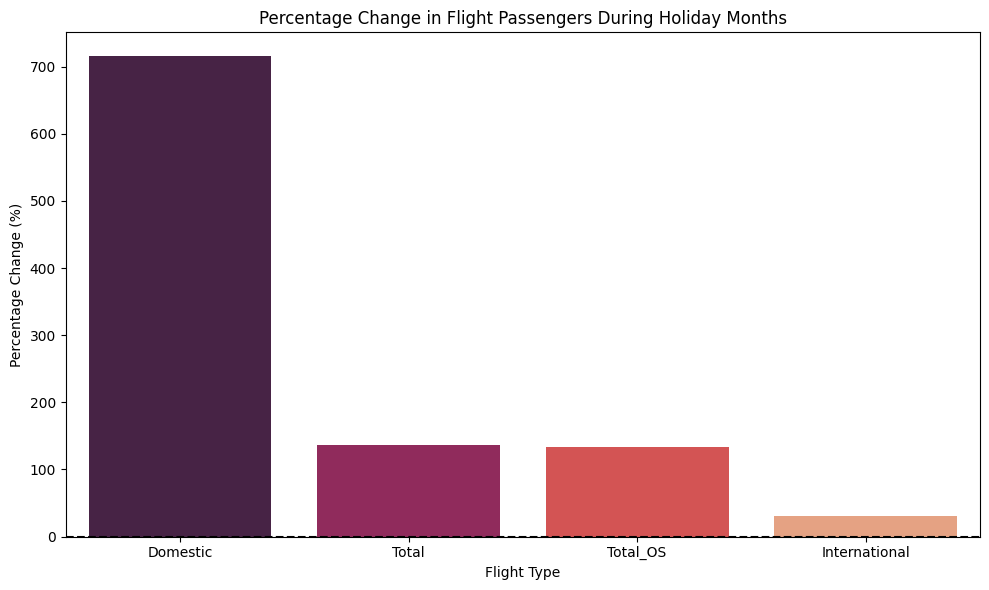

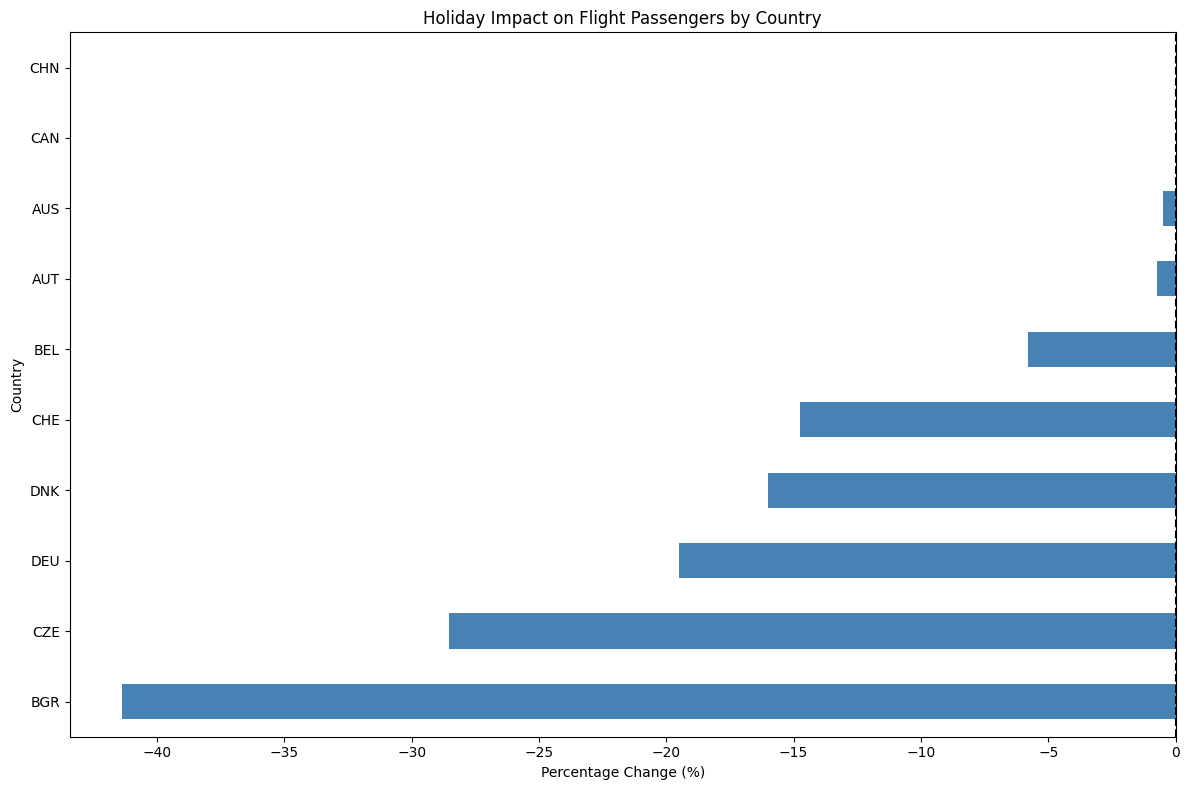

In [11]:
print("Available columns in merged dataset:")
print(merged.columns.tolist())

if 'ADM_name' in merged.columns:
    print("\nUsing ADM_name for country names")
    country_col = 'ADM_name'
else:
    print("\nUsing ISO3 for country codes")
    country_col = 'ISO3'

numeric_cols = ['Total', 'Domestic', 'International', 'Total_OS']
for col in numeric_cols:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors="coerce")

plt.figure(figsize=(14, 10))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(
    data=merged,
    x='is_holiday_month',
    y='Total',
    ax=axes[0, 0],
    errorbar=None,
    palette='viridis'
)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No Holiday', 'Holiday Month'])
axes[0, 0].set_title('Total Flights: Holiday vs Non-Holiday Months')
axes[0, 0].set_ylabel('Passengers (thousands)')

sns.barplot(
    data=merged[merged['Domestic'].notna()],
    x='is_holiday_month',
    y='Domestic',
    ax=axes[0, 1],
    errorbar=None,
    palette='magma'
)
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No Holiday', 'Holiday Month'])
axes[0, 1].set_title('Domestic Flights: Holiday vs Non-Holiday Months')
axes[0, 1].set_ylabel('Passengers (thousands)')

sns.barplot(
    data=merged[merged['International'].notna()],
    x='is_holiday_month',
    y='International',
    ax=axes[1, 0],
    errorbar=None,
    palette='plasma'
)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No Holiday', 'Holiday Month'])
axes[1, 0].set_title('International Flights: Holiday vs Non-Holiday Months')
axes[1, 0].set_ylabel('Passengers (thousands)')

sns.barplot(
    data=merged[merged['Total_OS'].notna()],
    x='is_holiday_month',
    y='Total_OS',
    ax=axes[1, 1],
    errorbar=None,
    palette='cividis'
)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No Holiday', 'Holiday Month'])
axes[1, 1].set_title('Other Sources: Holiday vs Non-Holiday Months')
axes[1, 1].set_ylabel('Passengers (thousands)')

plt.tight_layout()
plt.show()

flight_types = ['Total', 'Domestic', 'International', 'Total_OS']
holiday_impact = {}

for flight_type in flight_types:
    if flight_type in merged.columns:
        grouped = merged.groupby('is_holiday_month')[flight_type].mean()
        
        if 0 in grouped.index and 1 in grouped.index:
            change = ((grouped[1] - grouped[0]) / grouped[0]) * 100
            holiday_impact[flight_type] = change

impact_df = pd.DataFrame.from_dict(holiday_impact, orient='index', columns=['Percentage_Change'])
impact_df = impact_df.sort_values('Percentage_Change', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=impact_df.index, y=impact_df['Percentage_Change'], palette='rocket')
plt.title('Percentage Change in Flight Passengers During Holiday Months')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Flight Type')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

if country_col in merged.columns:
    country_counts = merged.groupby(country_col)['Total'].count().sort_values(ascending=False)
    
    top_countries = country_counts.head(10).index.tolist()
    
    top_country_data = merged[merged[country_col].isin(top_countries)]
    
    holiday_impact_by_country = top_country_data.groupby([country_col, 'is_holiday_month'])['Total'].mean().unstack()
    holiday_impact_by_country['Change_Pct'] = ((holiday_impact_by_country[1] - holiday_impact_by_country[0]) / holiday_impact_by_country[0]) * 100
    
    plt.figure(figsize=(12, 8))
    holiday_impact_by_country['Change_Pct'].sort_values().plot(kind='barh', color='steelblue')
    plt.title('Holiday Impact on Flight Passengers by Country')
    plt.xlabel('Percentage Change (%)')
    plt.ylabel('Country')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2775242425.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_int_top.index, y=impact_int_top["Holiday_Lift_%"], palette="viridis")
C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2775242425.py:22: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\artur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


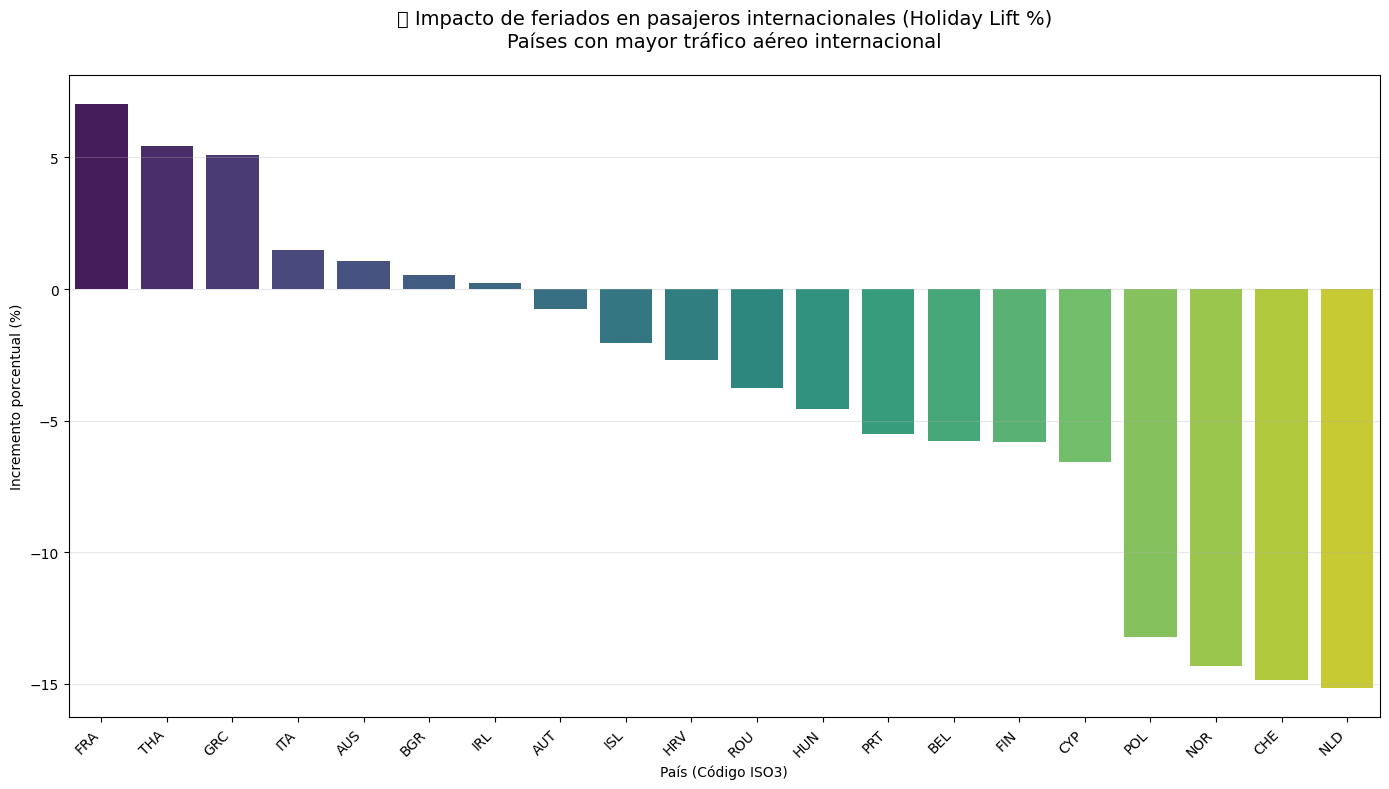

C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2775242425.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_dom_top.index, y=impact_dom_top["Holiday_Lift_%"], palette="magma")
C:\Users\artur\AppData\Local\Temp\ipykernel_8520\2775242425.py:40: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\artur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


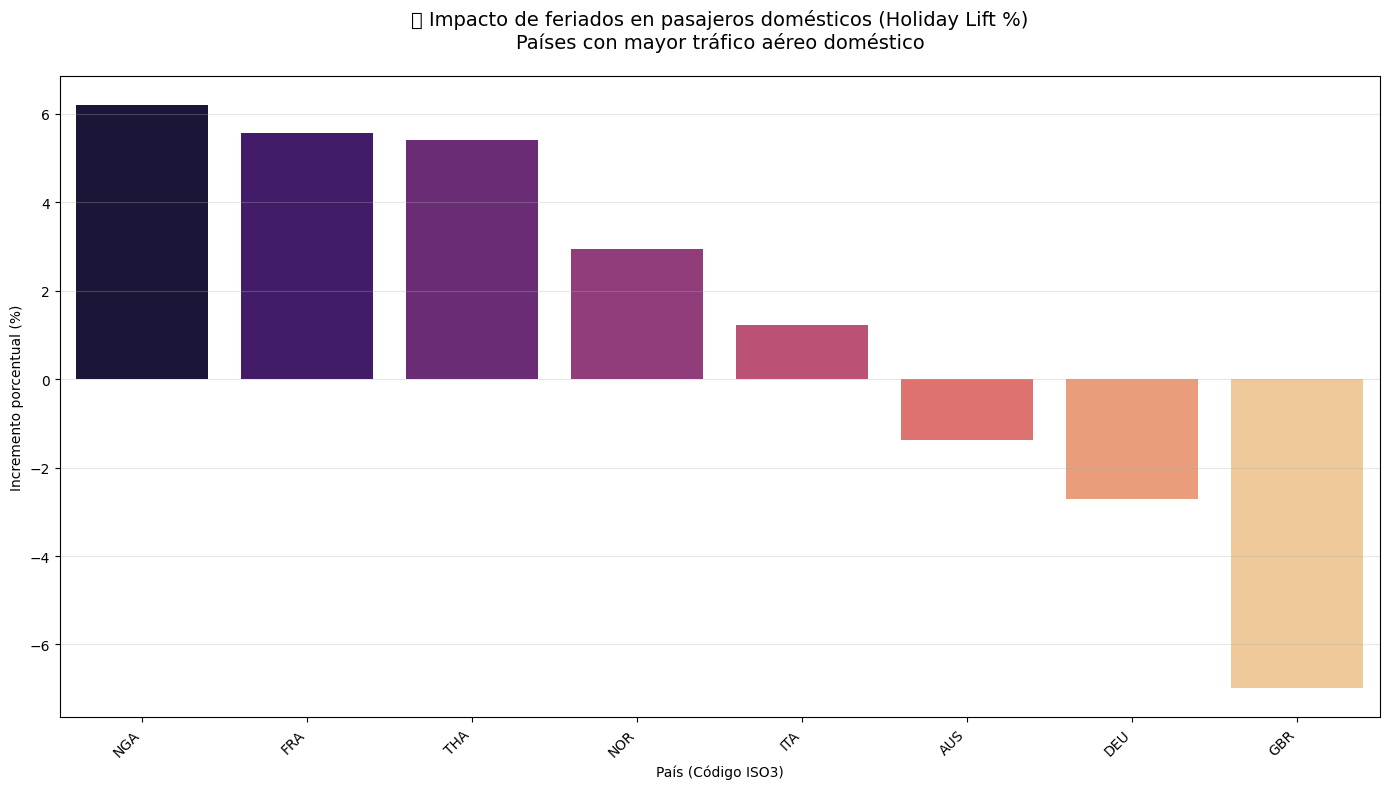

<Figure size 1200x800 with 0 Axes>

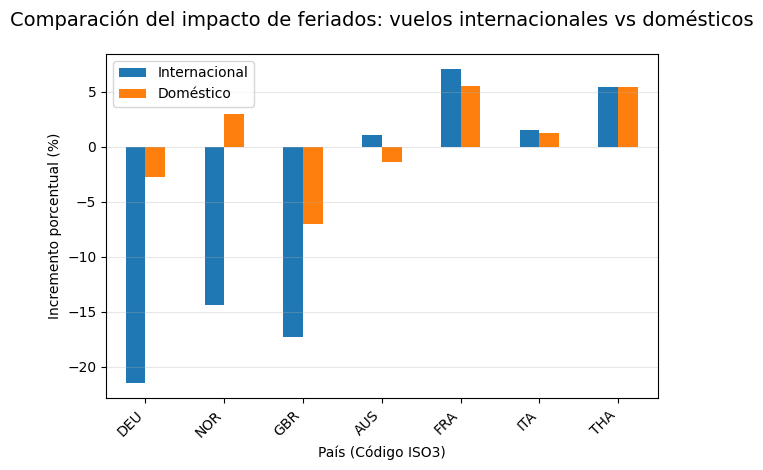

In [12]:
merged["International"] = pd.to_numeric(merged["International"], errors="coerce")
merged["Domestic"] = pd.to_numeric(merged["Domestic"], errors="coerce")
merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce")

min_flights_threshold = 1000  

intl_data = merged[merged["International"] > min_flights_threshold].copy()

impact_int = intl_data.groupby(["ISO3", "is_holiday_month"])["International"].mean().unstack()
impact_int["Holiday_Lift_%"] = (impact_int[1] - impact_int[0]) / impact_int[0] * 100
impact_int = impact_int.sort_values("Holiday_Lift_%", ascending=False).dropna()

impact_int_top = impact_int.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=impact_int_top.index, y=impact_int_top["Holiday_Lift_%"], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("🌍 Impacto de feriados en pasajeros internacionales (Holiday Lift %)\nPaíses con mayor tráfico aéreo internacional", fontsize=14, pad=20)
plt.ylabel("Incremento porcentual (%)")
plt.xlabel("País (Código ISO3)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

dom_data = merged[merged["Domestic"] > min_flights_threshold].copy()

impact_dom = dom_data.groupby(["ISO3", "is_holiday_month"])["Domestic"].mean().unstack()
impact_dom["Holiday_Lift_%"] = (impact_dom[1] - impact_dom[0]) / impact_dom[0] * 100
impact_dom = impact_dom.sort_values("Holiday_Lift_%", ascending=False).dropna()

impact_dom_top = impact_dom.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=impact_dom_top.index, y=impact_dom_top["Holiday_Lift_%"], palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("🌍 Impacto de feriados en pasajeros domésticos (Holiday Lift %)\nPaíses con mayor tráfico aéreo doméstico", fontsize=14, pad=20)
plt.ylabel("Incremento porcentual (%)")
plt.xlabel("País (Código ISO3)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

combined_impact = pd.DataFrame({
    'International_Lift': impact_int['Holiday_Lift_%'],
    'Domestic_Lift': impact_dom['Holiday_Lift_%']
}).dropna()

combined_impact['Difference'] = combined_impact['International_Lift'] - combined_impact['Domestic_Lift']
combined_impact = combined_impact.sort_values('Difference', key=abs, ascending=False).head(15)

plt.figure(figsize=(12, 8))
combined_impact[['International_Lift', 'Domestic_Lift']].plot(kind='bar')
plt.title("Comparación del impacto de feriados: vuelos internacionales vs domésticos", fontsize=14, pad=20)
plt.ylabel("Incremento porcentual (%)")
plt.xlabel("País (Código ISO3)")
plt.xticks(rotation=45, ha='right')
plt.legend(["Internacional", "Doméstico"])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



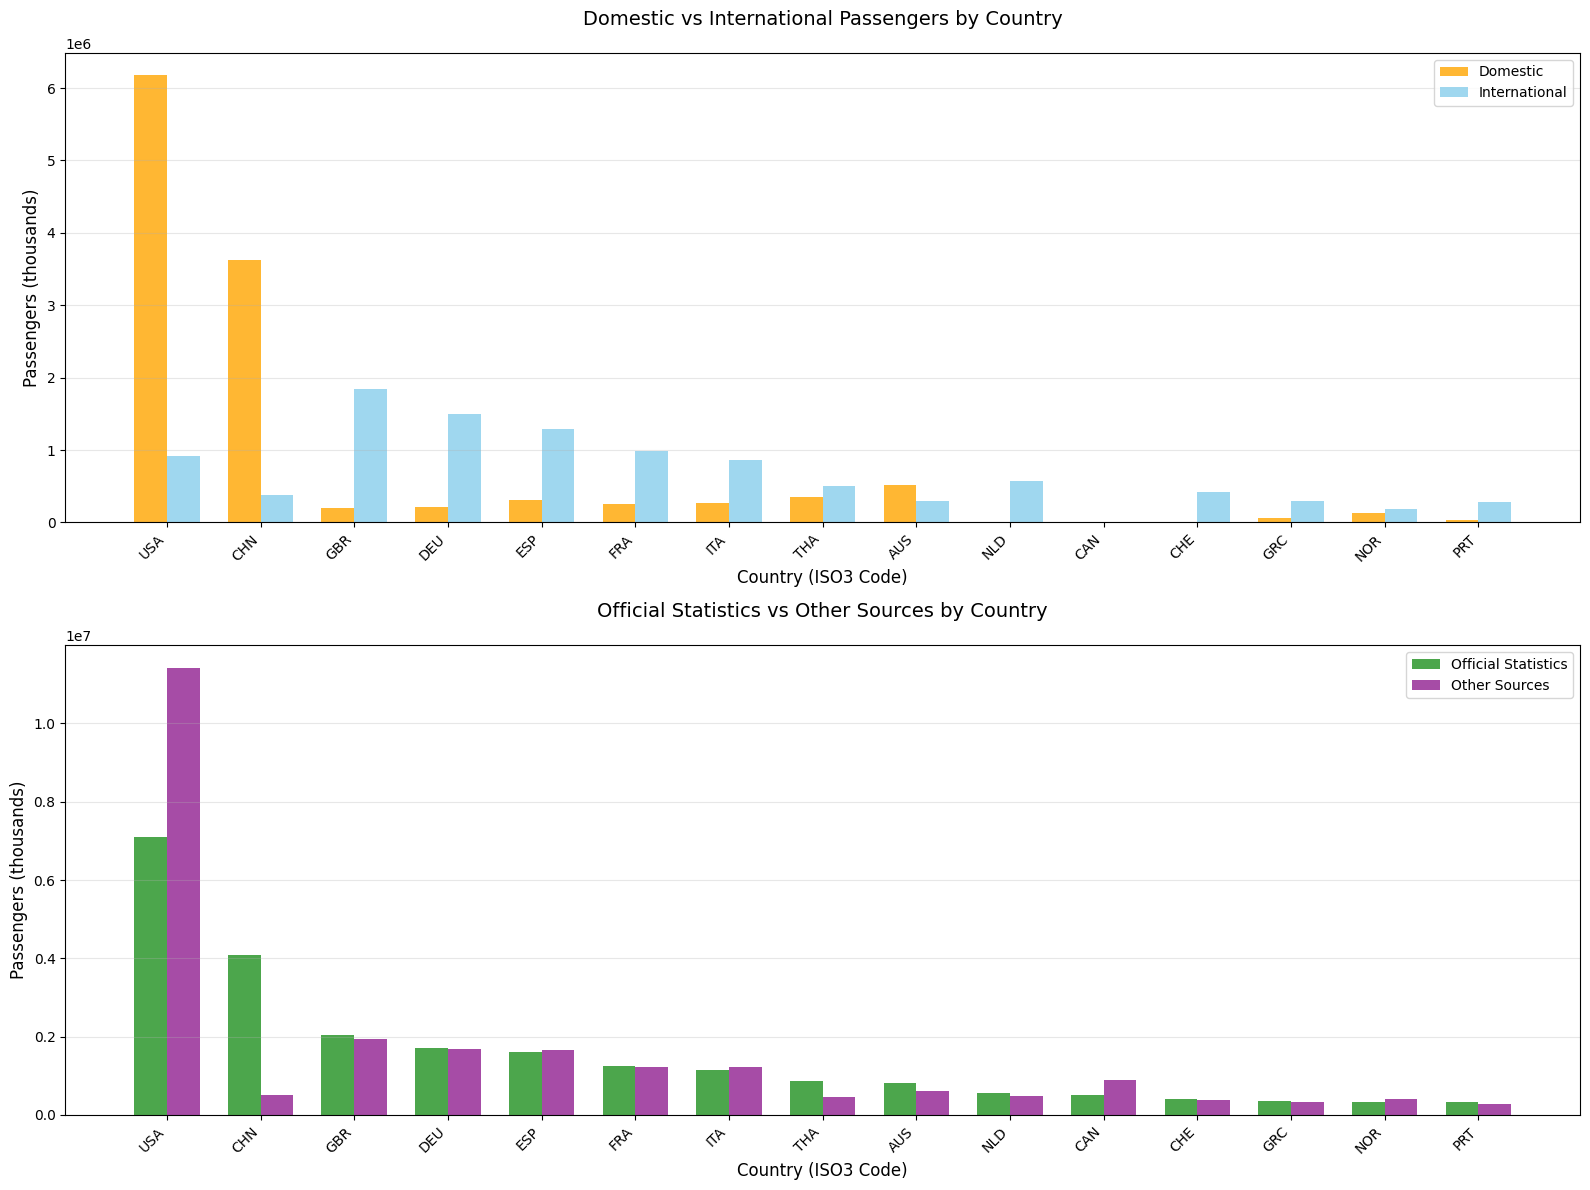

In [13]:

merged["Total"] = pd.to_numeric(merged["Total"], errors="coerce").fillna(0)
merged["Domestic"] = pd.to_numeric(merged["Domestic"], errors="coerce").fillna(0)
merged["International"] = pd.to_numeric(merged["International"], errors="coerce").fillna(0)
merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce").fillna(0)

merged_filtered = merged[
    (merged["Total"] > 0) | 
    (merged["Domestic"] > 0) | 
    (merged["International"] > 0) | 
    (merged["Total_OS"] > 0)
].copy()

flights_by_country = merged_filtered.groupby('ISO3')[
    ['Total', 'Domestic', 'International', 'Total_OS']
].sum().reset_index()

flights_by_country = flights_by_country.sort_values('Total', ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

bar_width = 0.35
index = np.arange(len(flights_by_country))

ax1.bar(index, flights_by_country['Domestic'], bar_width, label='Domestic', color='orange', alpha=0.8)
ax1.bar(index + bar_width, flights_by_country['International'], bar_width, label='International', color='skyblue', alpha=0.8)

ax1.set_xlabel('Country (ISO3 Code)', fontsize=12)
ax1.set_ylabel('Passengers (thousands)', fontsize=12)
ax1.set_title('Domestic vs International Passengers by Country', fontsize=14, pad=20)
ax1.set_xticks(index + bar_width/2)
ax1.set_xticklabels(flights_by_country['ISO3'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

ax2.bar(index, flights_by_country['Total'], bar_width, label='Official Statistics', color='green', alpha=0.7)
ax2.bar(index + bar_width, flights_by_country['Total_OS'], bar_width, label='Other Sources', color='purple', alpha=0.7)

ax2.set_xlabel('Country (ISO3 Code)', fontsize=12)
ax2.set_ylabel('Passengers (thousands)', fontsize=12)
ax2.set_title('Official Statistics vs Other Sources by Country', fontsize=14, pad=20)
ax2.set_xticks(index + bar_width/2)
ax2.set_xticklabels(flights_by_country['ISO3'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

comparison_data = flights_by_country[(flights_by_country['Total'] > 0) & (flights_by_country['Total_OS'] > 0)]

plt.scatter(comparison_data['Total'], comparison_data['Total_OS'], alpha=0.7)
plt.plot([0, comparison_data['Total'].max()], [0, comparison_data['Total'].max()], 'r--', alpha=0.7)  

plt.xlabel('Official Statistics (thousands of passengers)', fontsize=12)
plt.ylabel('Other Sources (thousands of passengers)', fontsize=12)
plt.title('Comparison of Passenger Counts: Official Statistics vs Other Sources', fontsize=14, pad=20)
plt.grid(alpha=0.3)

for i, row in comparison_data.iterrows():
    if row['Total'] > comparison_data['Total'].quantile(0.75):   
        plt.annotate(row['ISO3'], (row['Total'], row['Total_OS']), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


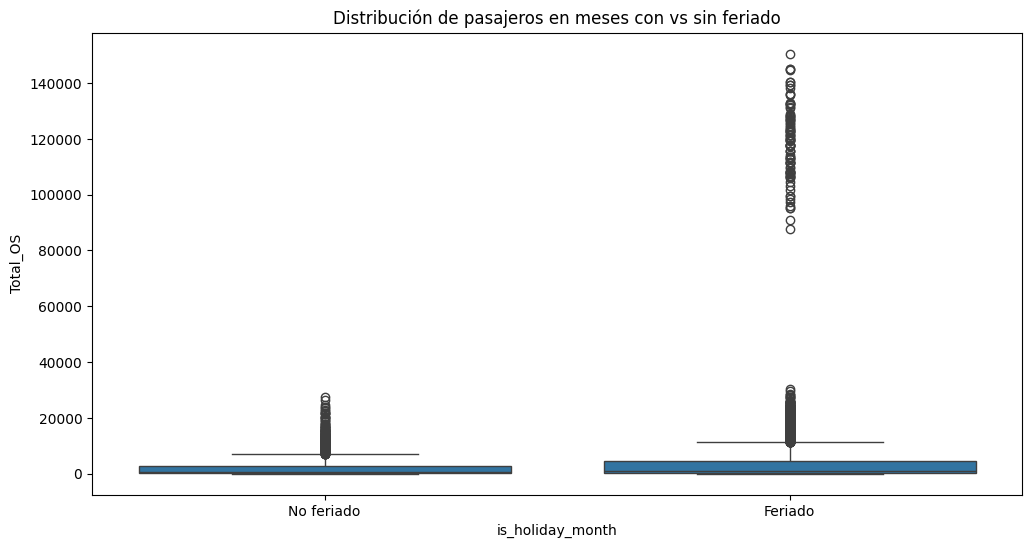

Países disponibles: ['ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'BEL' 'BGR' 'BHR' 'BIH' 'BLR' 'BRA'
 'BRB' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CYM' 'CYP' 'CZE' 'DEU' 'DNK'
 'DOM' 'ECU' 'EGY' 'ESP' 'EST' 'FIN' 'FRA' 'FRO' 'GBR' 'GEO' 'GIB' 'GLP'
 'GRC' 'GTM' 'HKG' 'HRV' 'HUN' 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JAM' 'JPN'
 'KHM' 'KOR' 'KOS' 'LCA' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MEX' 'MKD'
 'MLT' 'MNE' 'MTQ' 'MYS' 'NGA' 'NLD' 'NOR' 'NZL' 'OMN' 'PAN' 'PER' 'PHL'
 'POL' 'PRT' 'PRY' 'ROU' 'RUS' 'SGP' 'SLV' 'SRB' 'SVK' 'SVN' 'SWE' 'THA'
 'TUR' 'TWN' 'UKR' 'URY' 'USA' 'ZAF']


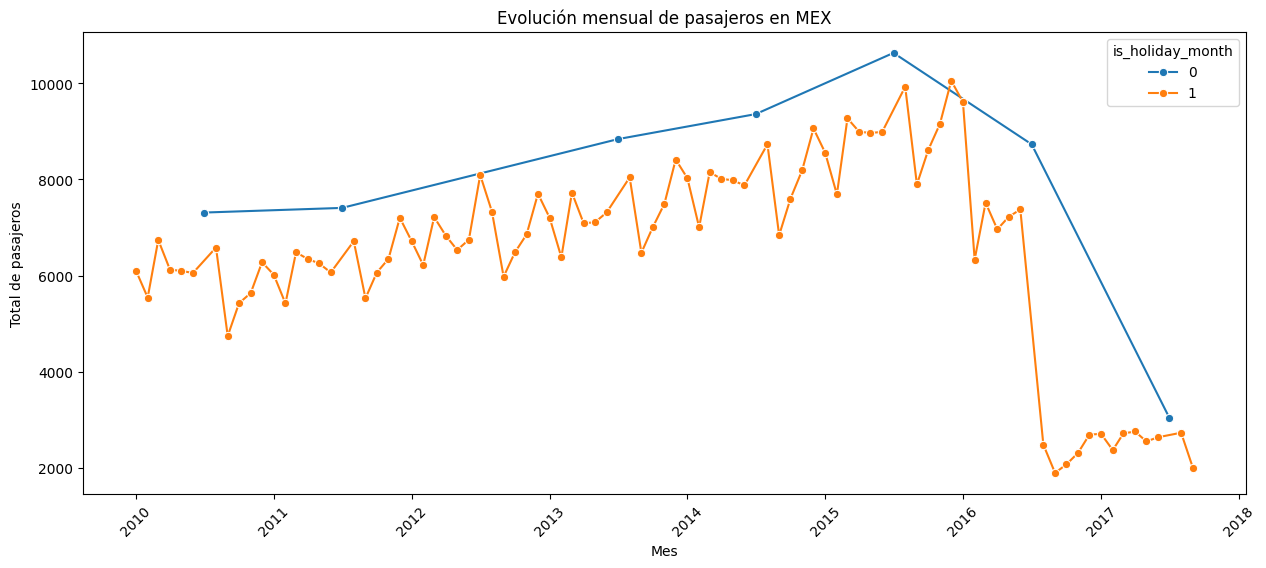

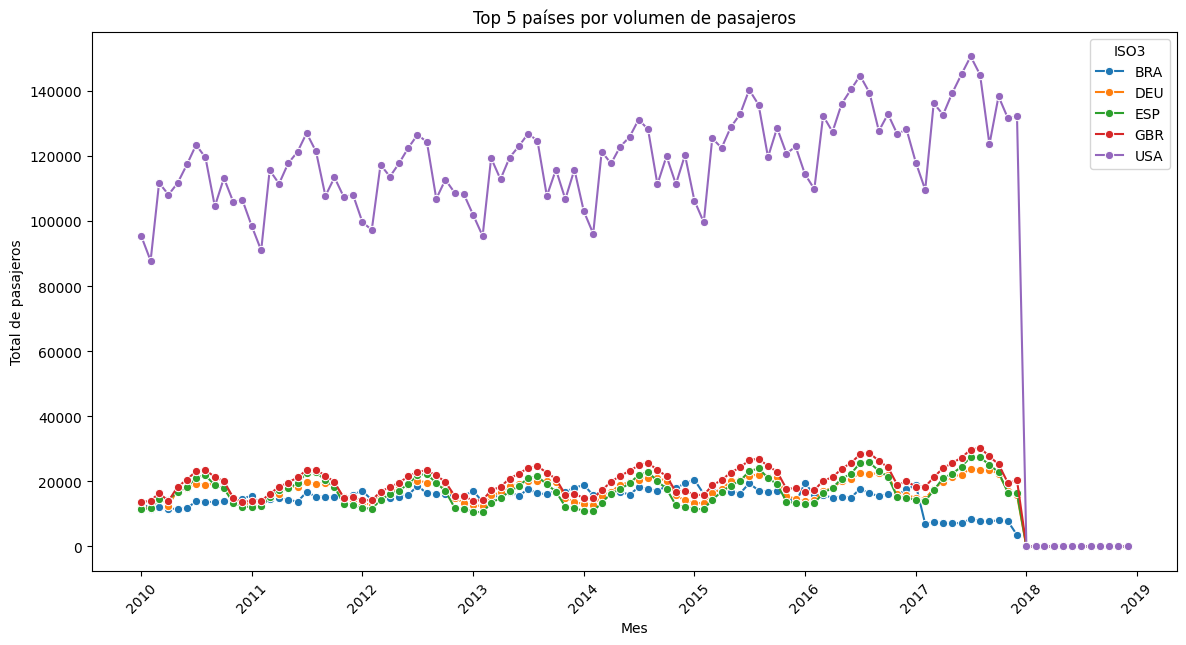

In [14]:

merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce")

if merged["year_month"].dtype == 'object':
    merged["year_month_dt"] = pd.to_datetime(merged["year_month"])
else:
    merged["year_month_dt"] = merged["year_month"]

plt.figure(figsize=(12,6))
sns.boxplot(x="is_holiday_month", y="Total_OS", data=merged)
plt.xticks([0,1], ["No feriado","Feriado"])
plt.title("Distribución de pasajeros en meses con vs sin feriado")
plt.show()

print("Países disponibles:", merged["ISO3"].unique())

pais_seleccionado = "MEX"  
subset = merged[merged["ISO3"] == pais_seleccionado]

plt.figure(figsize=(15,6))
sns.lineplot(
    x="year_month_dt", 
    y="Total_OS", 
    data=subset, 
    hue="is_holiday_month", 
    marker="o"
)
plt.title(f"Evolución mensual de pasajeros en {pais_seleccionado}")
plt.xlabel("Mes")
plt.ylabel("Total de pasajeros")
plt.xticks(rotation=45)
plt.show()

top_countries = merged.groupby("ISO3")["Total_OS"].sum().nlargest(5).index
subset = merged[merged["ISO3"].isin(top_countries)]

plt.figure(figsize=(14,7))
sns.lineplot(
    x="year_month_dt", 
    y="Total_OS", 
    hue="ISO3", 
    data=subset, 
    marker="o"
)
plt.title("Top 5 países por volumen de pasajeros")
plt.xlabel("Mes")
plt.ylabel("Total de pasajeros")
plt.xticks(rotation=45)
plt.show()

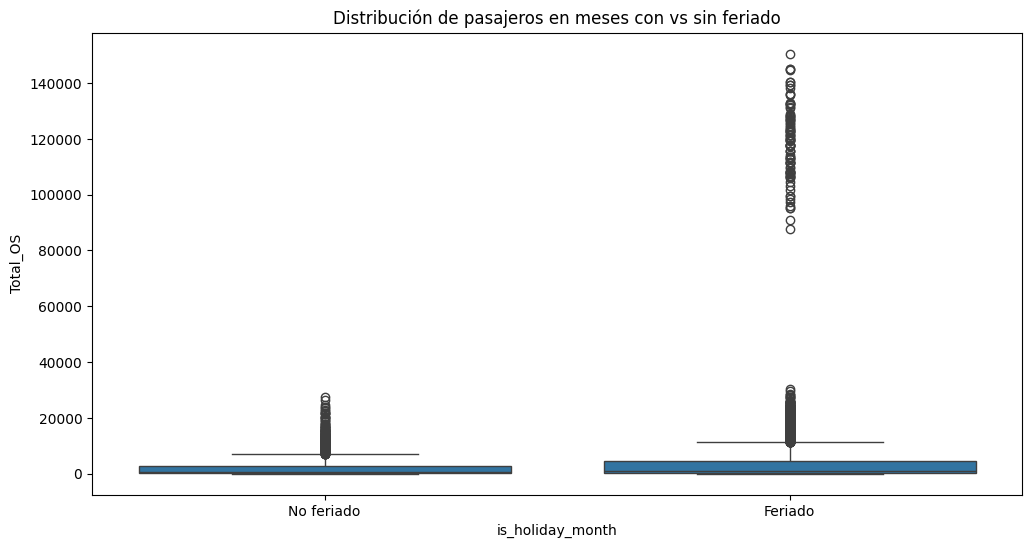

Países disponibles: ['ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'BEL' 'BGR' 'BHR' 'BIH' 'BLR' 'BRA'
 'BRB' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CYM' 'CYP' 'CZE' 'DEU' 'DNK'
 'DOM' 'ECU' 'EGY' 'ESP' 'EST' 'FIN' 'FRA' 'FRO' 'GBR' 'GEO' 'GIB' 'GLP'
 'GRC' 'GTM' 'HKG' 'HRV' 'HUN' 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JAM' 'JPN'
 'KHM' 'KOR' 'KOS' 'LCA' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MEX' 'MKD'
 'MLT' 'MNE' 'MTQ' 'MYS' 'NGA' 'NLD' 'NOR' 'NZL' 'OMN' 'PAN' 'PER' 'PHL'
 'POL' 'PRT' 'PRY' 'ROU' 'RUS' 'SGP' 'SLV' 'SRB' 'SVK' 'SVN' 'SWE' 'THA'
 'TUR' 'TWN' 'UKR' 'URY' 'USA' 'ZAF']


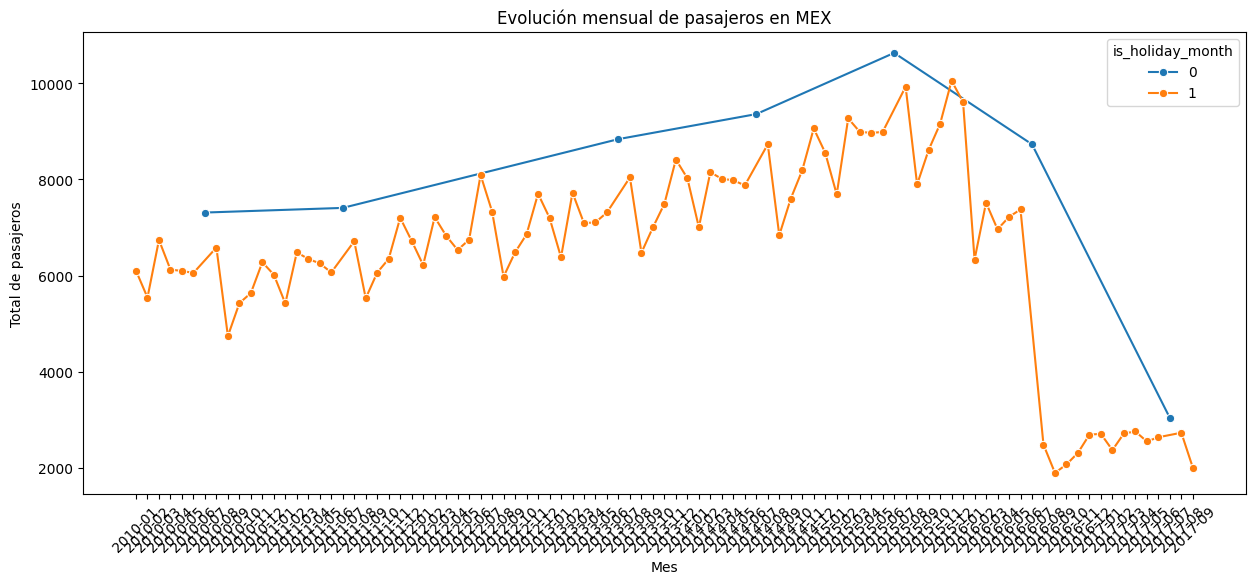

Media de pasajeros:
Mes sin feriado: 2469.97
Mes con feriado: 5564.07
Diferencia porcentual: 125.27%


In [15]:
merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce")

plt.figure(figsize=(12,6))
sns.boxplot(x="is_holiday_month", y="Total_OS", data=merged)
plt.xticks([0,1], ["No feriado","Feriado"])
plt.title("Distribución de pasajeros en meses con vs sin feriado")
plt.show()

print("Países disponibles:", merged["ISO3"].unique())

pais_seleccionado = "MEX"  
subset = merged[merged["ISO3"] == pais_seleccionado]

plt.figure(figsize=(15,6))
sns.lineplot(
    x="year_month", 
    y="Total_OS", 
    data=subset, 
    hue="is_holiday_month", 
    marker="o"
)
plt.title(f"Evolución mensual de pasajeros en {pais_seleccionado}")
plt.xlabel("Mes")
plt.ylabel("Total de pasajeros")
plt.xticks(rotation=45)
plt.show()

mean_comparison = merged.groupby('is_holiday_month')['Total_OS'].mean()
print("Media de pasajeros:")
print(f"Mes sin feriado: {mean_comparison[0]:.2f}")
print(f"Mes con feriado: {mean_comparison[1]:.2f}")

diff_percent = ((mean_comparison[1] - mean_comparison[0]) / mean_comparison[0]) * 100
print(f"Diferencia porcentual: {diff_percent:.2f}%")

=== ANÁLISIS DESCRIPTIVO ===
Resumen estadístico de pasajeros por tipo de mes:
                   count         mean           std  min       25%      50%  \
is_holiday_month                                                              
0                 1794.0  2469.966216   3996.591215  0.0  160.6155  662.545   
1                 5448.0  5564.073336  16206.288393  0.0  154.7995  932.885   

                         75%         max  
is_holiday_month                          
0                 2884.35050   27632.202  
1                 4581.86725  150581.215  

Diferencia porcentual en tráfico aéreo: 125.27%


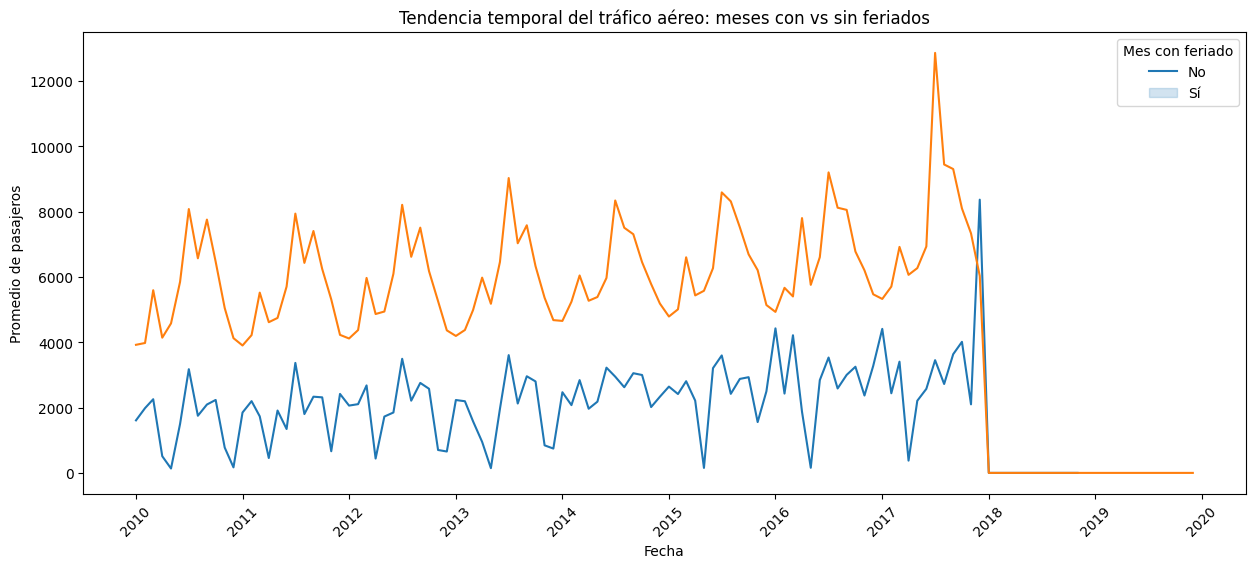


=== ANÁLISIS POR PAÍSES ===
Top 10 países por volumen de tráfico aéreo: ['USA', 'GBR', 'DEU', 'ESP', 'BRA', 'FRA', 'ITA', 'TUR', 'IND', 'CAN']
País USA no tiene datos completos para ambos tipos de meses
País ESP no tiene datos completos para ambos tipos de meses
País IND no tiene datos completos para ambos tipos de meses
País CAN no tiene datos completos para ambos tipos de meses


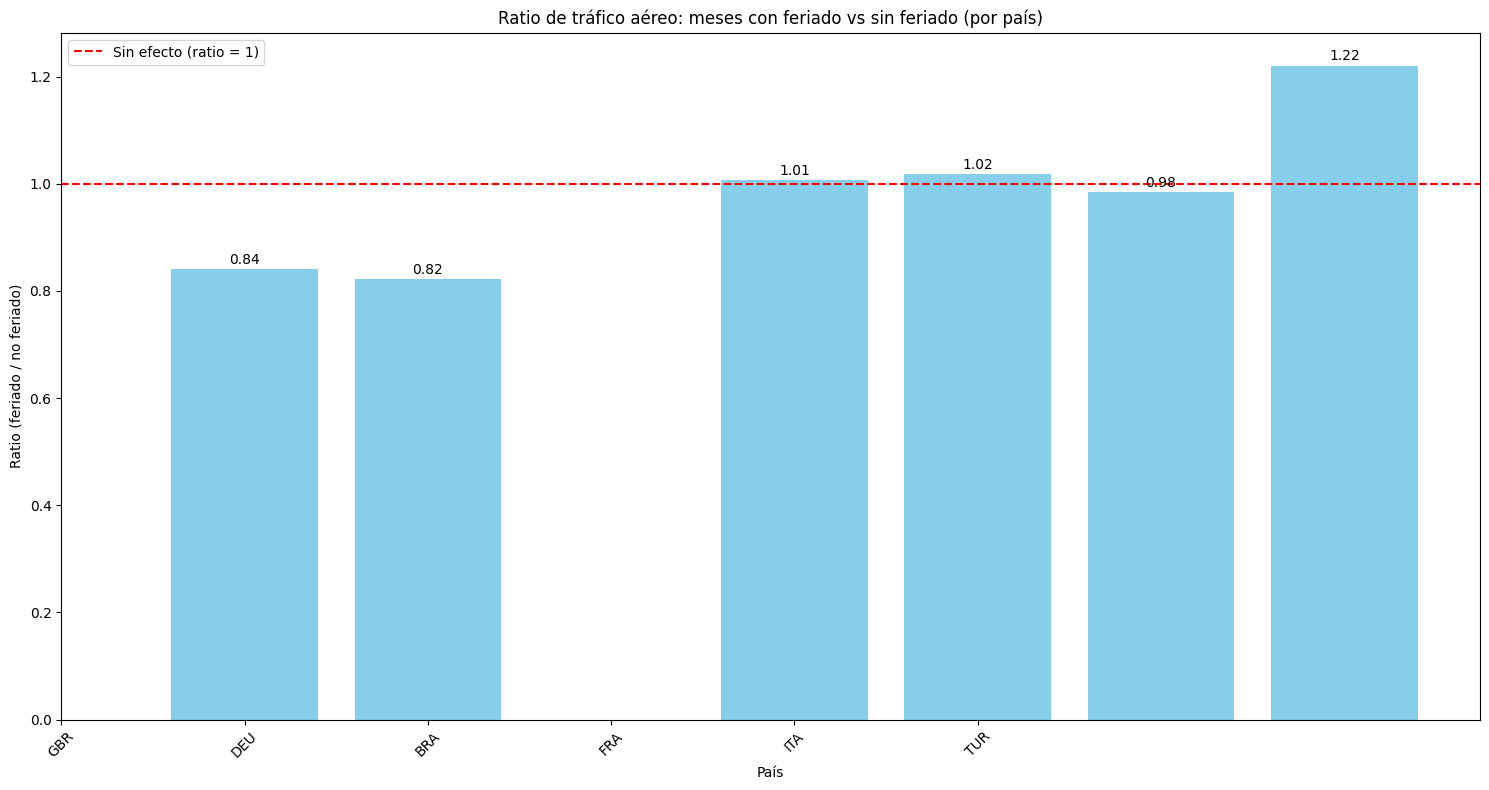


=== ANÁLISIS POR ESTACIONES ===


<Figure size 1000x600 with 0 Axes>

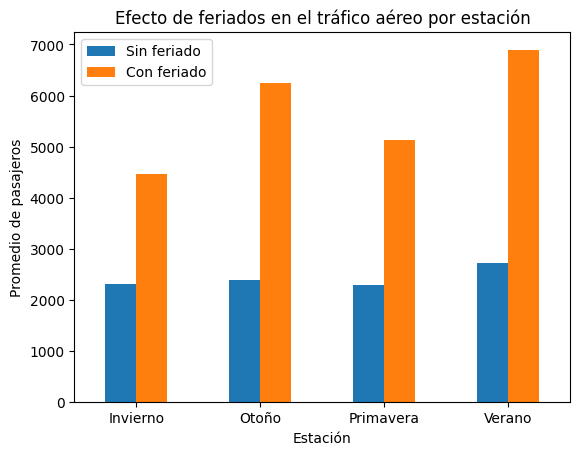


=== ANÁLISIS ESTADÍSTICO ===
Prueba t de diferencia de medias:
Estadístico t: -12.9470
Valor p: 0.0000
Hay una diferencia estadísticamente significativa en el tráfico aéreo entre meses con y sin feriados.
Tamaño del efecto (d de Cohen): 0.2179
Efecto moderado

=== MODELO DE REGRESIÓN LINEAL ===
                            OLS Regression Results                            
Dep. Variable:               Total_OS   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     64.10
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.37e-15
Time:                        16:47:58   Log-Likelihood:                -79514.
No. Observations:                7242   AIC:                         1.590e+05
Df Residuals:                    7240   BIC:                         1.590e+05
Df Model:                           1                                  

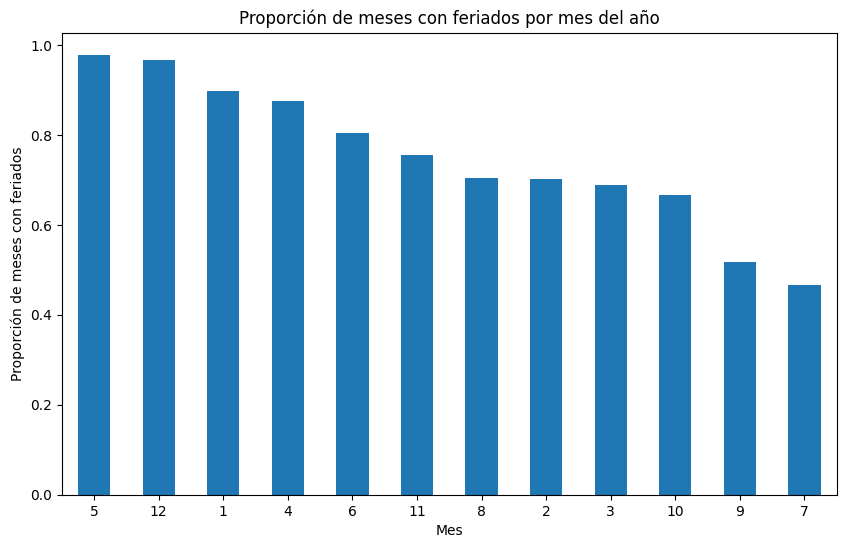


=== CONCLUSIONES ===
Este análisis examina el impacto de los días feriados en el tráfico aéreo sin utilizar datos de PIB.
Se han considerado múltiples dimensiones: distribución general, tendencias temporales, diferencias por país,
variaciones estacionales y análisis estadísticos para determinar la significancia de los efectos observados.


In [16]:

from scipy.stats import ttest_ind

merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce")

print("=== ANÁLISIS DESCRIPTIVO ===")
print("Resumen estadístico de pasajeros por tipo de mes:")
print(merged.groupby('is_holiday_month')['Total_OS'].describe())

mean_comparison = merged.groupby('is_holiday_month')['Total_OS'].mean()
diff_percent = ((mean_comparison[1] - mean_comparison[0]) / mean_comparison[0]) * 100
print(f"\nDiferencia porcentual en tráfico aéreo: {diff_percent:.2f}%")

plt.figure(figsize=(12, 6))
sns.boxplot(x="is_holiday_month", y="Total_OS", data=merged)
plt.xticks([0, 1], ["No feriado", "Feriado"])
plt.title("Distribución de pasajeros en meses con vs sin feriado")
plt.ylabel("Total de pasajeros")
plt.savefig('boxplot_feriados.png', dpi=300, bbox_inches='tight')
plt.show()


if not pd.api.types.is_datetime64_any_dtype(merged['year_month']):
    merged['year_month'] = pd.to_datetime(merged['year_month'])

monthly_avg = merged.groupby(['year_month', 'is_holiday_month'])['Total_OS'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_avg, x='year_month', y='Total_OS', hue='is_holiday_month')
plt.title("Tendencia temporal del tráfico aéreo: meses con vs sin feriados")
plt.xlabel("Fecha")
plt.ylabel("Promedio de pasajeros")
plt.legend(title="Mes con feriado", labels=["No", "Sí"])
plt.xticks(rotation=45)
plt.savefig('tendencia_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== ANÁLISIS POR PAÍSES ===")
top_countries = merged.groupby('ISO3')['Total_OS'].sum().nlargest(10).index.tolist()
print("Top 10 países por volumen de tráfico aéreo:", top_countries)

plt.figure(figsize=(15, 8))
ratios = []
country_labels = []

for i, country in enumerate(top_countries):
    country_data = merged[merged['ISO3'] == country]
    holiday_effect = country_data.groupby('is_holiday_month')['Total_OS'].mean()
    
    if 0 in holiday_effect.index and 1 in holiday_effect.index:
        effect_ratio = holiday_effect[1] / holiday_effect[0]
        ratios.append(effect_ratio)
        country_labels.append(country)
        
        plt.bar(i, effect_ratio, color='skyblue')
        plt.text(i, effect_ratio + 0.01, f'{effect_ratio:.2f}', ha='center')
    else:
        print(f"País {country} no tiene datos completos para ambos tipos de meses")

plt.axhline(y=1, color='r', linestyle='--', label='Sin efecto (ratio = 1)')
plt.xticks(range(len(ratios)), country_labels, rotation=45)
plt.title("Ratio de tráfico aéreo: meses con feriado vs sin feriado (por país)")
plt.ylabel("Ratio (feriado / no feriado)")
plt.xlabel("País")
plt.legend()
plt.tight_layout()
plt.savefig('ratio_por_pais.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== ANÁLISIS POR ESTACIONES ===")
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

merged['season'] = merged['Month'].apply(get_season)

seasonal_effect = merged.groupby(['season', 'is_holiday_month'])['Total_OS'].mean().unstack()

plt.figure(figsize=(10, 6))
seasonal_effect.plot(kind='bar')
plt.title("Efecto de feriados en el tráfico aéreo por estación")
plt.ylabel("Promedio de pasajeros")
plt.xlabel("Estación")
plt.legend(["Sin feriado", "Con feriado"])
plt.xticks(rotation=0)
plt.savefig('efecto_estacional.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== ANÁLISIS ESTADÍSTICO ===")
no_holiday_data = merged[merged['is_holiday_month'] == 0]['Total_OS'].dropna()
holiday_data = merged[merged['is_holiday_month'] == 1]['Total_OS'].dropna()

t_stat, p_value = ttest_ind(no_holiday_data, holiday_data, equal_var=False)

print(f"Prueba t de diferencia de medias:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en el tráfico aéreo entre meses con y sin feriados.")
else:
    print("No hay evidencia de diferencia estadísticamente significativa en el tráfico aéreo entre meses con y sin feriados.")

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

effect_size = cohens_d(holiday_data, no_holiday_data)
print(f"Tamaño del efecto (d de Cohen): {effect_size:.4f}")

if abs(effect_size) < 0.2:
    print("Efecto pequeño")
elif abs(effect_size) < 0.5:
    print("Efecto moderado")
elif abs(effect_size) < 0.8:
    print("Efecto grande")
else:
    print("Efecto muy grande")

try:
    import statsmodels.api as sm
    print("\n=== MODELO DE REGRESIÓN LINEAL ===")
    X = merged[['is_holiday_month']]
    X = sm.add_constant(X)  
    y = merged['Total_OS'].dropna()
    
    model = sm.OLS(y, X).fit()
    
    print(model.summary())
except ImportError:
    print("\nstatsmodels no está instalado. No se puede realizar el análisis de regresión.")
    print("Puedes instalarlo con: pip install statsmodels")

print("\n=== ANÁLISIS POR MESES ===")
monthly_holiday_effect = merged.groupby('Month')['is_holiday_month'].mean().sort_values(ascending=False)
print("Proporción de meses con feriados por mes:")
print(monthly_holiday_effect)

plt.figure(figsize=(10, 6))
monthly_holiday_effect.plot(kind='bar')
plt.title("Proporción de meses con feriados por mes del año")
plt.ylabel("Proporción de meses con feriados")
plt.xlabel("Mes")
plt.xticks(rotation=0)
plt.savefig('feriados_por_mes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== CONCLUSIONES ===")
print("Este análisis examina el impacto de los días feriados en el tráfico aéreo sin utilizar datos de PIB.")
print("Se han considerado múltiples dimensiones: distribución general, tendencias temporales, diferencias por país,")
print("variaciones estacionales y análisis estadísticos para determinar la significancia de los efectos observados.")

Correlación general:
              Total  Total_OS
Total     1.000000  0.779096
Total_OS  0.779096  1.000000

Correlación con feriado:
              Total  Total_OS
Total     1.000000  0.780646
Total_OS  0.780646  1.000000

Correlación sin feriado:
              Total  Total_OS
Total     1.000000  0.627875
Total_OS  0.627875  1.000000


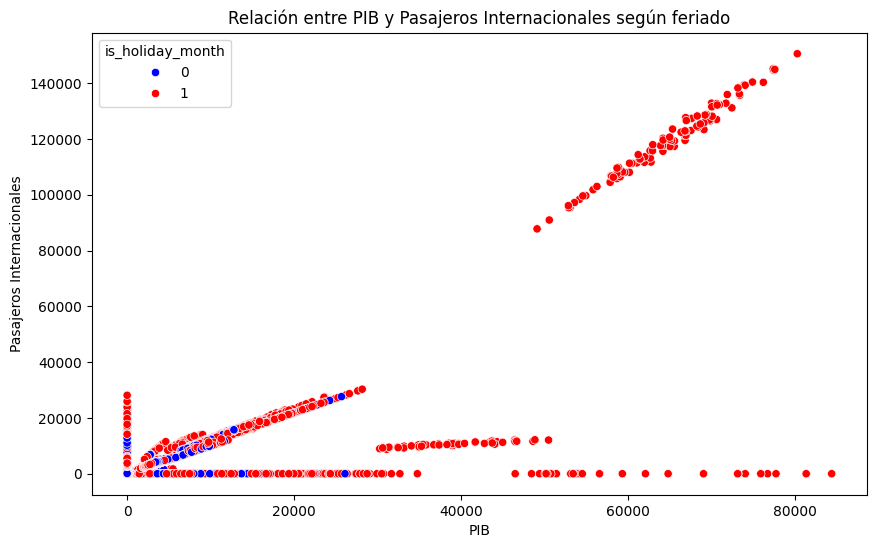

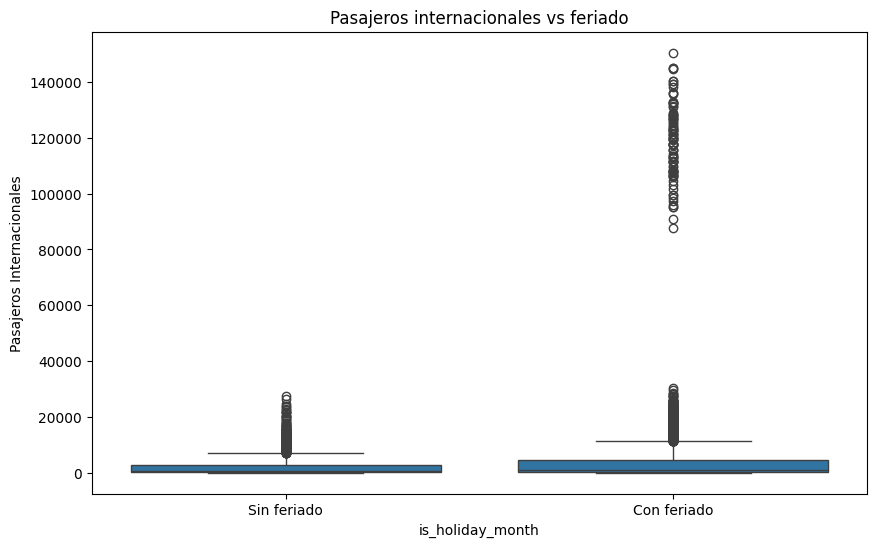

                            OLS Regression Results                            
Dep. Variable:               Total_OS   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     5591.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:48:00   Log-Likelihood:                -76164.
No. Observations:                7242   AIC:                         1.523e+05
Df Residuals:                    7239   BIC:                         1.524e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              640.9248    211.784  

In [17]:
merged = merged.dropna(subset=['Total'])

merged["Total"] = pd.to_numeric(merged["Total"], errors="coerce")
merged["Total_OS"] = pd.to_numeric(merged["Total_OS"], errors="coerce")
merged["is_holiday_month"] = pd.to_numeric(merged["is_holiday_month"], errors="coerce")

merged_clean = merged.dropna(subset=["Total", "Total_OS", "is_holiday_month"])

corr = merged_clean[["Total", "Total_OS"]].corr()
print("Correlación general:\n", corr)

with_holiday = merged_clean[merged_clean["is_holiday_month"] == 1]
without_holiday = merged_clean[merged_clean["is_holiday_month"] == 0]

print("\nCorrelación con feriado:\n", with_holiday[["Total", "Total_OS"]].corr())
print("\nCorrelación sin feriado:\n", without_holiday[["Total", "Total_OS"]].corr())

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_clean,
    x="Total", 
    y="Total_OS", 
    hue="is_holiday_month",
    palette={0:"blue", 1:"red"}
)
plt.title("Relación entre PIB y Pasajeros Internacionales según feriado")
plt.xlabel("PIB")
plt.ylabel("Pasajeros Internacionales")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(
    x="is_holiday_month",
    y="Total_OS",
    data=merged_clean
)
plt.xticks([0,1], ["Sin feriado", "Con feriado"])
plt.title("Pasajeros internacionales vs feriado")
plt.ylabel("Pasajeros Internacionales")
plt.show()

X = merged_clean[["Total", "is_holiday_month"]]
X = sm.add_constant(X)  

y = merged_clean["Total_OS"]

model = sm.OLS(y, X).fit()
print(model.summary())

Correlación general:
              Total  Domestic
Total     1.000000  0.937867
Domestic  0.937867  1.000000
Con feriado:
              Total  Domestic
Total     1.000000  0.945485
Domestic  0.945485  1.000000
Sin feriado:
             Total  Domestic
Total     1.00000   0.75741
Domestic  0.75741   1.00000


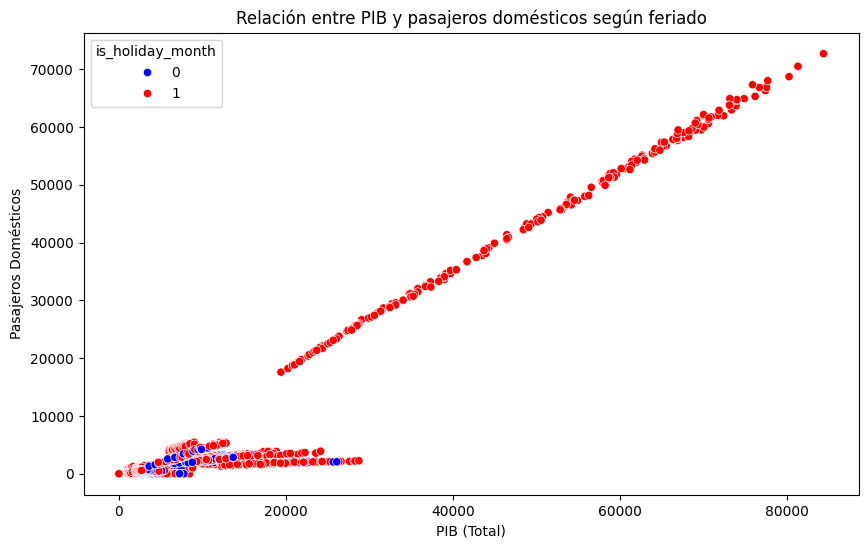

                            OLS Regression Results                            
Dep. Variable:               Domestic   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 2.644e+04
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:48:00   Log-Likelihood:                -67725.
No. Observations:                7242   AIC:                         1.355e+05
Df Residuals:                    7239   BIC:                         1.355e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -991.2296     66.041  

In [18]:
merged["Total"] = pd.to_numeric(merged["Total"], errors="coerce")
merged["Domestic"] = pd.to_numeric(merged["Domestic"], errors="coerce")

merged_clean = merged.dropna(subset=["Total", "Domestic", "is_holiday_month"])

corr = merged_clean[["Total", "Domestic"]].corr()
print("Correlación general:\n", corr)

with_holiday = merged_clean[merged_clean["is_holiday_month"] == 1]
without_holiday = merged_clean[merged_clean["is_holiday_month"] == 0]

print("Con feriado:\n", with_holiday[["Total", "Domestic"]].corr())
print("Sin feriado:\n", without_holiday[["Total", "Domestic"]].corr())

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_clean,
    x="Total", 
    y="Domestic", 
    hue="is_holiday_month",
    palette={0:"blue", 1:"red"}
)
plt.title("Relación entre PIB y pasajeros domésticos según feriado")
plt.xlabel("PIB (Total)")
plt.ylabel("Pasajeros Domésticos")
plt.show()

X = merged_clean[["Total", "is_holiday_month"]]
X = sm.add_constant(X)
y = merged_clean["Domestic"]

model = sm.OLS(y, X).fit()
print(model.summary())